In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import torch
import torchvision
import torch.utils.data
from PIL import Image

In [ ]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder


transform = transforms.Compose([transforms.ToTensor(), transforms.Resize(size=(512,512))])

# path = r"D:\Datasets\dataset\train"  # for windows
# test_path = r"D:\Datasets\dataset\test"  # for windows


#github ds path
# path = r"/content/drive/MyDrive/Datasets for glycoma/dataset/train"  # for colab
# test_path = r"/content/drive/MyDrive/Datasets for glycoma/dataset/test"  # for colab



#acrima ds
path = r"/content/drive/MyDrive/Glycoma DS/MyACRIMA_splitted/train"  # for colab
test_path = r"/content/drive/MyDrive/Glycoma DS/MyACRIMA_splitted/test"  # for colab


my_ds1 = ImageFolder(path, transform=transform)

In [ ]:
img, label = my_ds1[80]
print(img.shape)
print(label)

torch.Size([3, 512, 512])
0


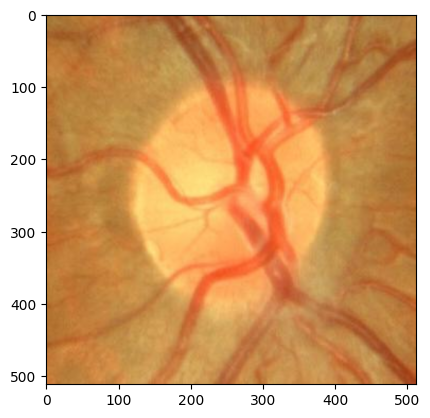

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(my_ds1[0][0].permute(1, 2, 0))

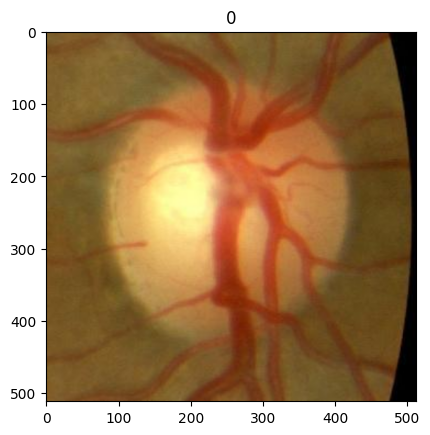

In [ ]:
from torch.utils.data import Dataset
import torchvision.transforms as tt
# see youtube vid about how to create custom datasets
# https://www.analyticsvidhya.com/blog/2021/09/torch-dataset-and-dataloader-early-loading-of-data/
# https://youtu.be/NVxCKdp0NhQ


dataloader = torch.utils.data.DataLoader(my_ds1, batch_size=36, shuffle=False)

toPil = tt.ToPILImage()

for img, label in dataloader:
    plt.title(label=label[35].item())
    plt.imshow(toPil(img[35]))
    break


# checked the customDS and dataloader, and they were tested/crosschecked to be found ok, img 36 in OG dataset is with glycoma and the label we got from dataloader is 1

In [ ]:
import torchvision.transforms as tt

#normalize is not working properly, ie its not giving values between -1 and 1

img_size = (256,256)

train_transforms = tt.Compose([

    tt.ToTensor(),
    tt.RandomHorizontalFlip(),
    tt.RandomVerticalFlip(),
    tt.RandomRotation(degrees=20),
    tt.Normalize([0.8302692,  0.46591546, 0.1925752 ],[0.18038563, 0.17536479, 0.13503085]),
    transforms.Resize(size=img_size),
])


test_transforms = tt.Compose([
    tt.ToTensor(),
    tt.Normalize([0.8287332,  0.46305142, 0.19529317], [0.18029495, 0.17558828, 0.13574058]),
    transforms.Resize(size=img_size),
])



my_ds1 = None  # this souldnt be used now so mark it as None

train_ds = ImageFolder(path, transform=train_transforms)


test_ds = ImageFolder(test_path, transform=test_transforms)

print(len(train_ds))
print(len(test_ds))
print(len(train_ds) + len(test_ds))
# print(train_ds[1])

1206
519
1725


In [ ]:
def getTrainDL(train_ds, batch_size):
    print(train_ds.targets)
    num_of_imgs_in_class = torch.unique(torch.Tensor(train_ds.targets), return_counts=True)
    print(num_of_imgs_in_class)
    # we need to make a weighted random sampler since classes are imbalanced (ie we have more imgs of non glycoma than glycoma)
    class_weights = [1/num_of_imgs_in_class[1][t] for t,data_class in enumerate(train_ds.classes)]
    print(class_weights) # class/label with high number of imgs will be assigned a lower weight caz of (1/num of imgs in that class)

    sample_weights = [0]*len(train_ds)



    for indx, label in enumerate(train_ds.targets):
        # print(indx,label)
        curr_weight = class_weights[label]
        sample_weights[indx] = curr_weight

    sampler = torch.utils.data.WeightedRandomSampler(sample_weights, num_samples=len(train_ds),replacement=True)
    dl = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, sampler=sampler)
    return dl


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

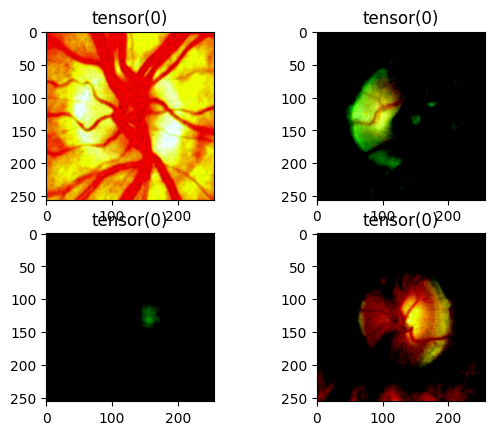

In [ ]:
batch_size = 4
trainLoader = getTrainDL(train_ds, 4)
testLoader = torch.utils.data.DataLoader(test_ds, batch_size, shuffle=False,)

# lets see if we can apply our transforms
for img, label in testLoader:

    # transformed_imgs_batch = [train_transforms(one_img) for one_img in img] #train_transforms can only take one img at a time

    plt.subplot(2, 2, 1)
    plt.title(label=label[0])
    plt.imshow(img[0].permute(1, 2, 0))

    plt.subplot(2, 2, 2)
    plt.title(label[0])
    # applying/testing our trnsform func, FIRST APPLY the transforms func then apply the .premute()
    plt.imshow(img[1].permute(1, 2, 0))

    plt.subplot(2, 2, 3)
    plt.title(label[2])
    plt.imshow(img[2].permute(1, 2, 0))

    plt.subplot(2, 2, 4)
    plt.title(label[3])
    plt.imshow(img[3].permute(1, 2, 0))

    break

In [ ]:
import torch.nn as nn
import torch.functional as F

In [ ]:
# IMPORANT!!!!!!!!!!!!!!!! These functions return data and do not do it inplace, make sure to assign the return values to a variable


def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda:0')
    else:
        return torch.device('cpu')


def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)


class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""

    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
import torch.nn.functional as F


def train_step(model, input_batch, actual_outputs, loss_func):
        pred = model(input_batch)
        loss = loss_func(pred, actual_outputs)
        return loss

def accuracy(outputs, labels):
        preds = torch.Tensor([[round(x.item())]  for x in outputs]) #the preds should be of shape [4,1]
        preds = to_device(preds, get_default_device()) # IMPORANT!!!!!!!!!!!!!!!! These functions return data and do not do it inplace, make sure to assign the return values to a variable
        acc = torch.sum(preds == labels).item() / len(preds)
        return acc

def validation(model, trainLoader, loss_func):
        with torch.no_grad(): # IMPORTANT!!!!!! Remeber to put with torch.no_grad() when testing the model or the gradients will keep accumulating and the memory will run out
            losses_sum = 0
            accuracies_sum = 0
            counter = 0
            model.eval()
            for imgs, labels in trainLoader:
                predictions = model(imgs)
                labels = torch.unsqueeze(labels, 1) # get the labels to shape [4,1]
                # also change dtype of labels frm int64 to float32
                labels = labels.type(torch.float32)

                loss  = loss_func(predictions, labels)
                losses_sum += loss

                acc = accuracy(predictions, labels)
                accuracies_sum += acc

                counter += 1

                avg_acc = accuracies_sum/counter
                avg_loss = losses_sum/counter

                # print(f" avg_acc = {avg_acc}")

        return avg_acc,avg_loss




def fit_model(model, lr, trainLoader, epochs, opt=torch.optim.Adam, train_transforms=train_transforms, loss_func = F.binary_cross_entropy, grad_clip_value=None):

    optimizer = opt(model.parameters(), lr,)
    model.train()

    lr_schduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,mode="min",factor=0.1,patience=2,verbose=True)


    for epoch in range(epochs):

        epoch_losses = []

        for imgs, labels in trainLoader:
            labels = torch.unsqueeze(labels, 1) # get the labels to shape [4,1]
            # also change dtype of labels frm int64 to float32
            labels = labels.type(torch.float32)

            loss = train_step(model, imgs, labels, loss_func)
            loss.backward()

            if grad_clip_value!=None:
                nn.utils.clip_grad.clip_grad_value_(model.parameters(), grad_clip_value)


            optimizer.step()
            optimizer.zero_grad()

            epoch_losses.append(loss.item())

        avg_loss = sum(epoch_losses)/len(epoch_losses)
        print(f"Avg loss for epoch {epoch} = {avg_loss}")
        lr_schduler.step(avg_loss)


    acc,loss = validation(model, trainLoader, loss_func)
    print(f"Done! Accuracy: {acc} & Loss: {loss}")


# Our Model

In [ ]:
# dont freeze any layers

model = torchvision.models.resnet50(weights=torchvision.models.ResNet50_Weights.IMAGENET1K_V2)
num_of_input_features = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_of_input_features, 1),
    nn.Sigmoid(),
)

# model = torchvision.models.densenet169(weights=torchvision.models.DenseNet169_Weights.IMAGENET1K_V1)
# num_of_input_features = model.classifier.in_features
# model.classifier = nn.Sequential(
#     nn.Linear(num_of_input_features, 1),
#     nn.Sigmoid(),
# )


# model = torchvision.models.efficientnet_b5(weights=torchvision.models.EfficientNet_B5_Weights.IMAGENET1K_V1)
# num_of_input_features = model.classifier[1].in_features
# print(num_of_input_features)
# model.classifier = nn.Sequential(
#     nn.Dropout(0.5),
#     nn.Linear(num_of_input_features, 1),
#     nn.Sigmoid(),
# )



# model = torchvision.models.vgg19_bn(weights=torchvision.models.VGG19_BN_Weights.IMAGENET1K_V1)
# num_of_input_features = model.classifier[6].in_features # in this we only change the last layer of the classifier, see the original model for more
# print(num_of_input_features)
# model.classifier[6] = nn.Sequential(
#     nn.Linear(num_of_input_features, 1),
#     nn.Sigmoid(),
# )


total_params = sum(p.numel() for p in model.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 23510081


Moving to gpu


In [ ]:
device = get_default_device()

model = to_device(model, device)

trainLoader = DeviceDataLoader(trainLoader, device)
testLoader = DeviceDataLoader(testLoader, device)

In [ ]:
for img, lable in trainLoader:
    print(img.shape)
    print(label)
    # print(f"Model output shape = {model(img).shape} & label shape = {label.shape}")
    print(model(img))
    break

torch.Size([4, 3, 256, 256])
tensor([0, 0, 0, 0])
tensor([[0.4935],
        [0.4691],
        [0.4935],
        [0.5016]], grad_fn=<SigmoidBackward0>)


In [ ]:
print(device)
# print(model)

cpu


In [ ]:
print("Initial acc:")
validation(model, testLoader, F.binary_cross_entropy)

Initial acc:


(0.38589743589743586, tensor(0.7082))

In [ ]:
fit_model(model, 0.0001, trainLoader, 5, grad_clip_value = 0.1)


In [ ]:
import gc
gc.collect()

print(len(testLoader))

validation(model, testLoader, F.binary_cross_entropy)


# The below models were trained on pre-trained initialized weights.

# after the given epochs the model overfit, I also changed/reduced lr manually if the models were getting a bad acc on the validation

#ViT have bad acc compared to others caz 1. All layers except classifier were freezed, 2. it reqires a large amout of data to train
# ViT (Vision transformers)( vit_b_16(weights=torchvision.models.ViT_B_16_Weights.IMAGENET1K_SWAG_E2E_V1) 85M params) 20 or 30? epochs acc = 82.8125, initial acc = 56% (only the classifier was trained, upper layers were frozen)
# ViT (Vision transformers)(vit_l_16(weights=torchvision.models.ViT_L_16_Weights.IMAGENET1K_SWAG_E2E_V1) 304M params) 10 epochs acc = 92.1875, initial acc = 48%  (only the classifier was trained, upper layers were frozen)

# after around 5 epochs resnet50 avg_acc = 93.75%, initial acc = 56, lr = ReduceLROnPlateau, grad_clip value  = 0.1, pre-trained weights = ResNet50_Weights.IMAGENET1K_V2, ALL LAYERS TRAINABLE

# DenseNet max acc = 98.4375% (8 epochs) , initial acc = 42%, lr = ReduceLROnPlateau, grad_clip value  = 0.1  pre-trained weights = DenseNet169_Weights.IMAGENET1K_V1, ALL LAYERS TRAINABLE

# efficientnet_b5 = 98.4375% (10 epochs), initial acc = 28%, lr = ReduceLROnPlateau, grad_clip value  = 0.1, pre-trained weights = EfficientNet_B5_Weights.IMAGENET1K_V1, ALL LAYERS TRAINABLE

# even tho vgg has a good acc it takes a lot of time to train caz it has lot of params (138M)
# VGG - 19BN max acc = 95.3125%, (7 or 10 epochs) initial acc = 50%, lr = ReduceLROnPlateau, grad_clip value  = 0.1, pre-trained weights = VGG19_BN_Weights.IMAGENET1K_V1, ALL LAYERS TRAINABLE

# both the inception models are in another file
# Inception v3 (9 epochs) acc = 98.4375%, initial acc = 31%, lr = ReduceLROnPlateau, grad_clip value  = 0.1, pre-trained weights = Inception_V3_Weights.IMAGENET1K_V1, ALL LAYERS TRAINABLE
# InceptionResnetv2 test acc = 98.4375% (7 epoch), initial acc = 48.4375% , lr = ReduceLROnPlateau, grad_clip value  = 0.1 (54 million params)


In [ ]:
path_to_save = "./resnet50.pt"

torch.save(model.state_dict(), path_to_save)